--- Step 1: Data Pre-processing ---
Missing values have been handled by dropping rows with NaNs.
Duplicate tracks have been removed.
Track album release date has been processed to extract the year.

Pre-processing complete. The dataset is ready for analysis and modeling.

--- Step 2: Data Analysis and Visualizations ---
Generating distribution plots for key audio features...


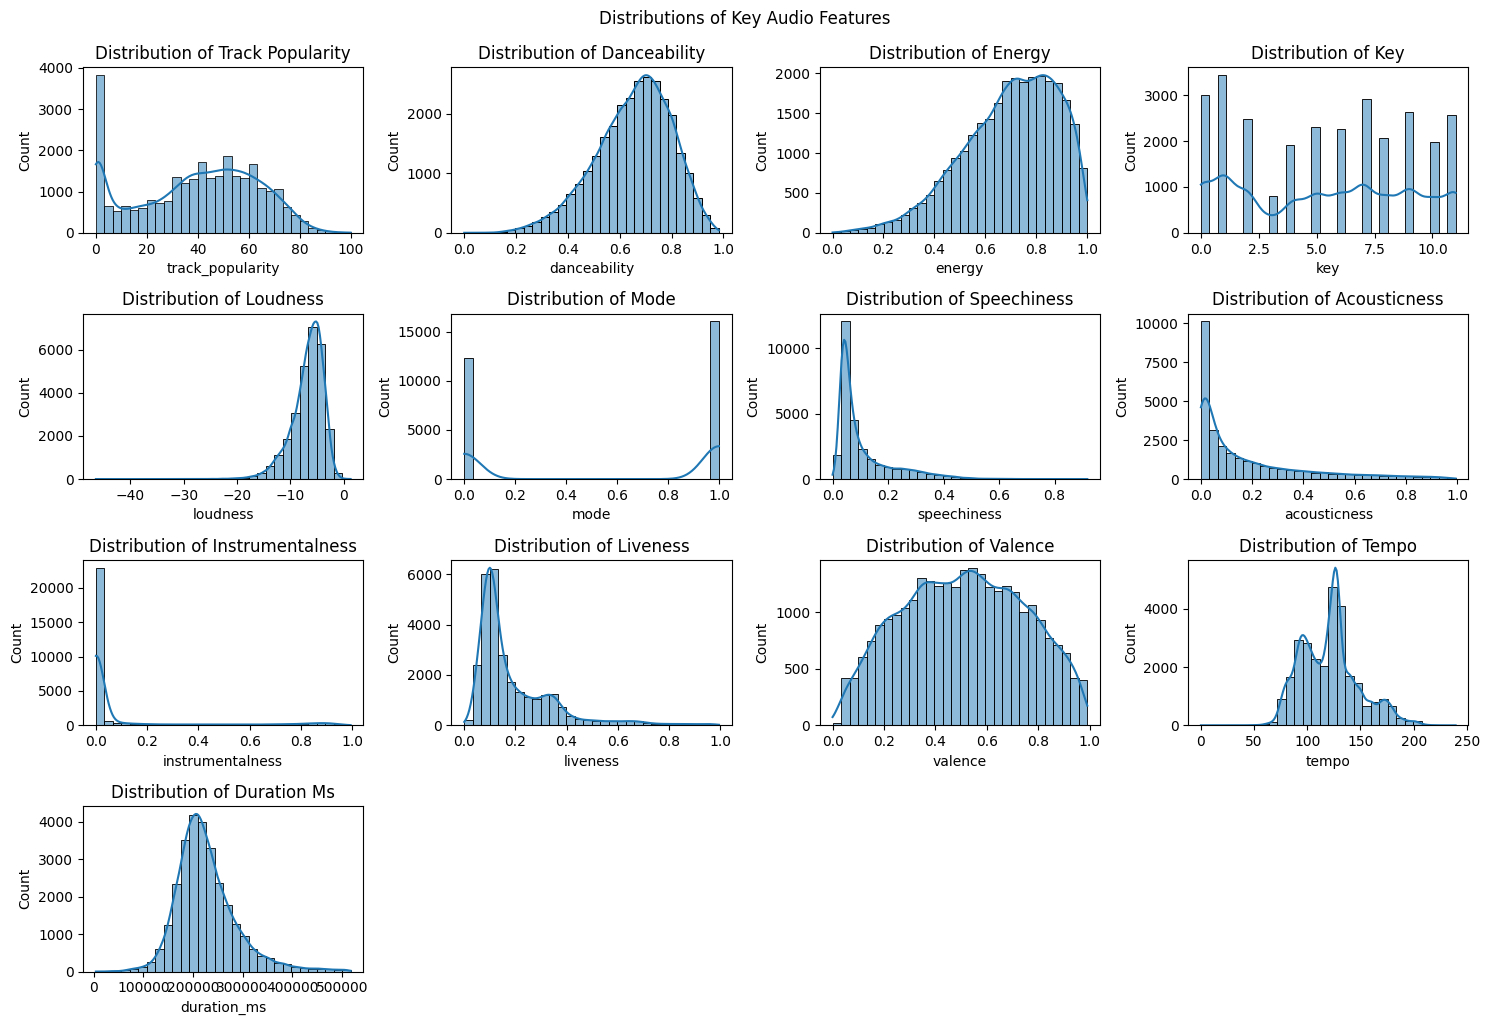

Generating a bar plot for song counts per playlist genre...


/tmp/ipython-input-3787597711.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index, palette='viridis')


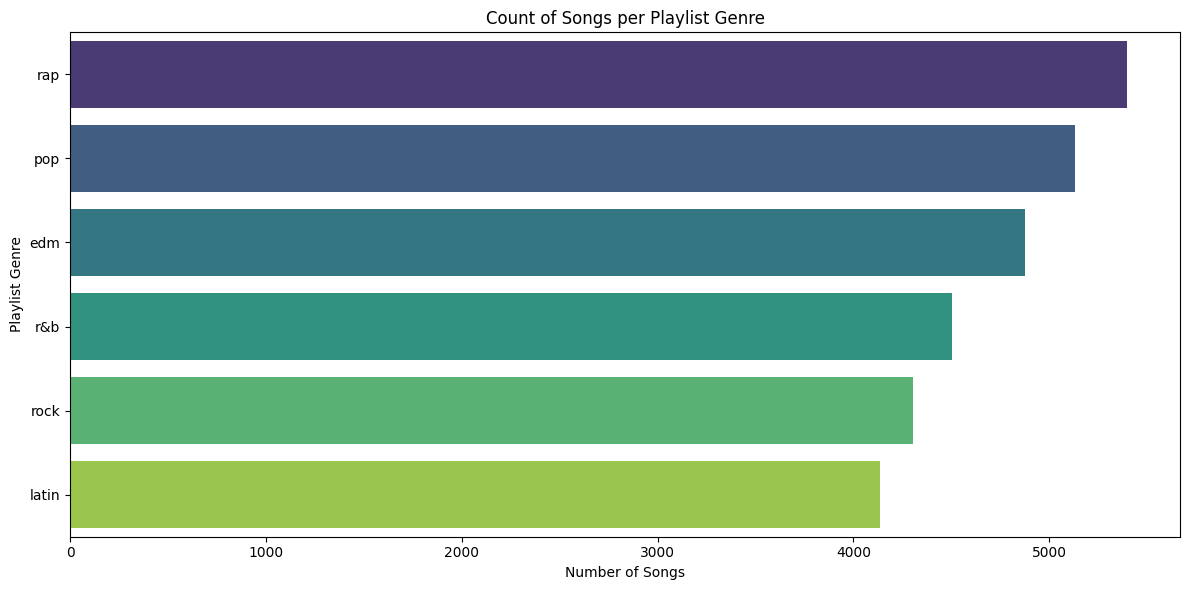


--- Step 3: Correlation Matrix ---
Generating a heatmap for the correlation matrix of numerical features...


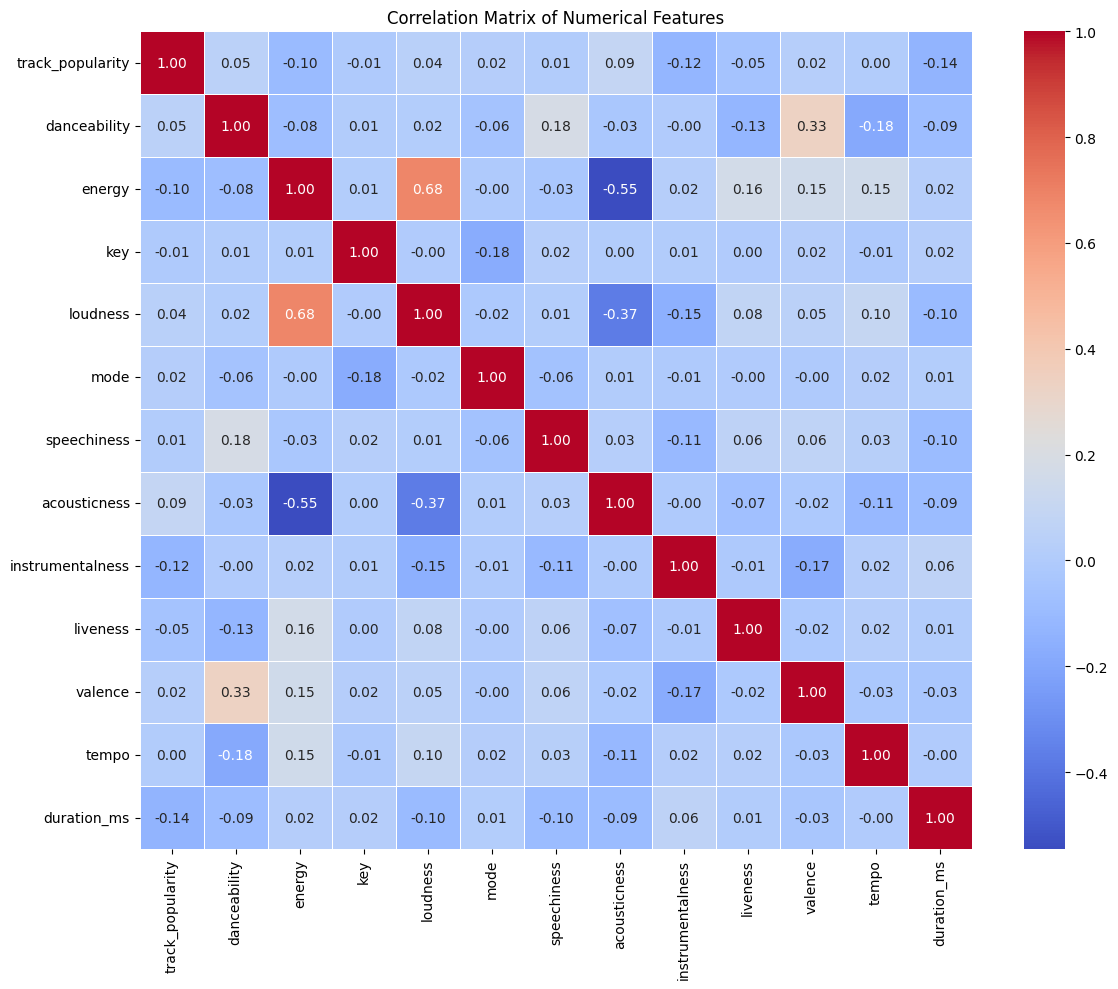


--- Step 4: Clustering ---
Determining the optimal number of clusters using the Elbow Method...


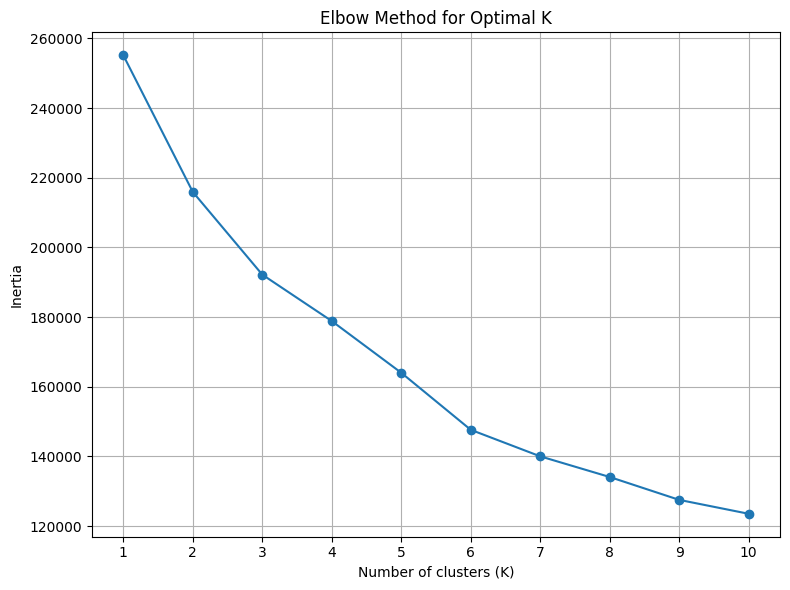

Based on the elbow method, we will proceed with an optimal number of clusters (e.g., K=4).
K-Means clustering applied with 4 clusters. A 'cluster' column has been added to the DataFrame.
Generating a scatter plot to visualize the clusters using PCA...


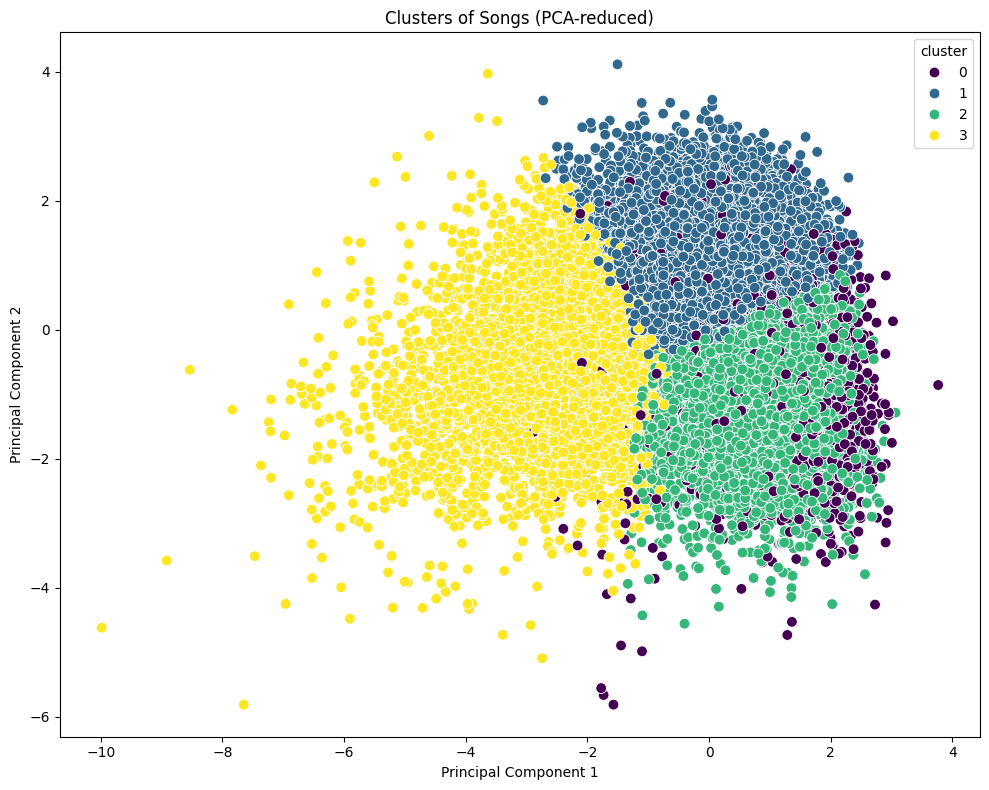

Analyzing the distribution of playlist genres within each cluster...
Cluster Distribution by Playlist Genre:
playlist_genre   edm  latin   pop   r&b   rap  rock
cluster                                            
0                666    339   397   315   564   465
1               1052   2549  1952  2144  3000   916
2               2896    703  1919   570   906  2071
3                263    545   864  1475   928   853


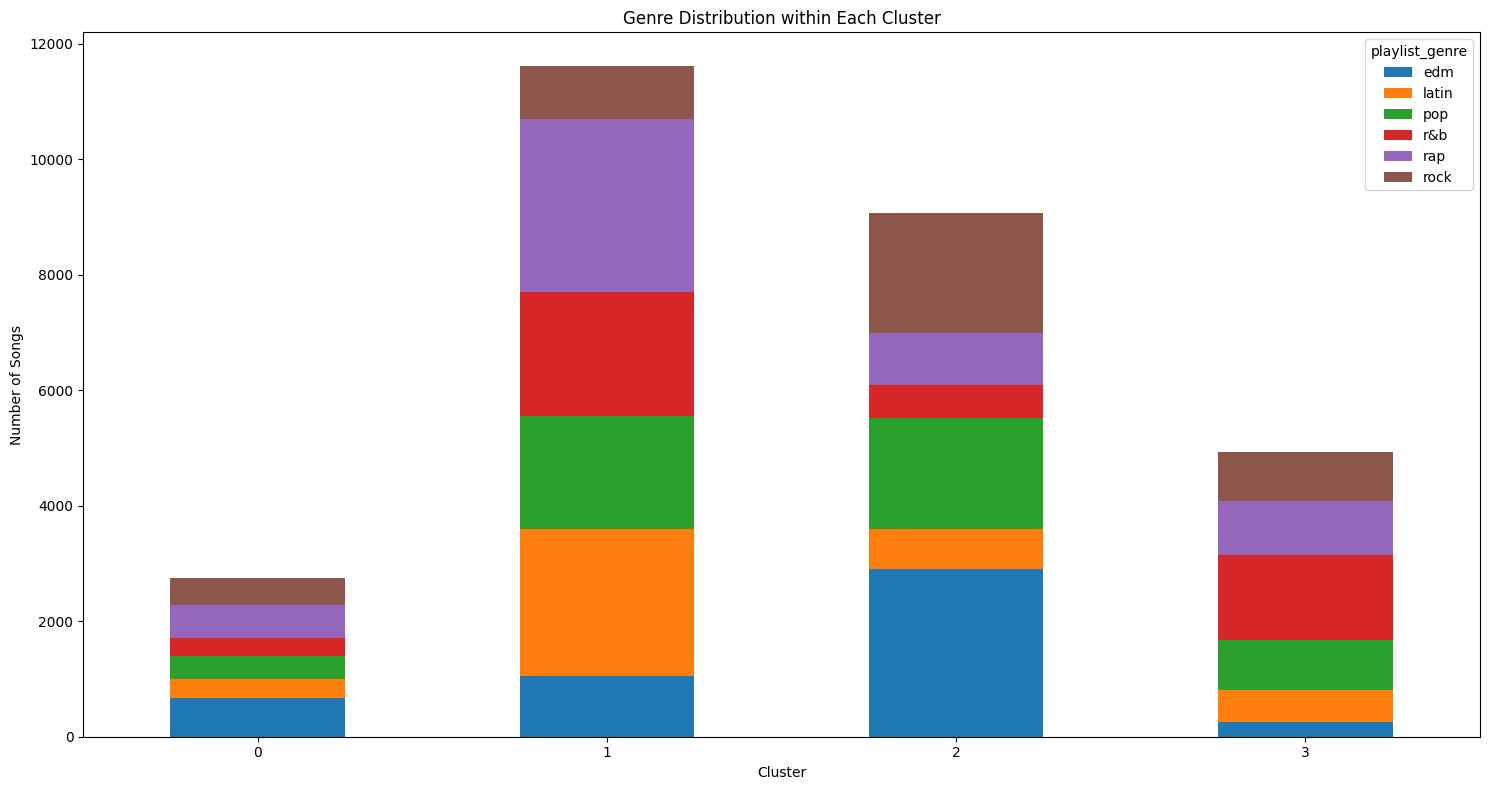


--- Step 5: Building a Recommendation System ---
The final model is the trained KMeans model. We will now demonstrate how to use it for recommendations.

Recommendation for 'Blinding Lights' (Cluster 2):
                                              track_name  track_artist  \
730                                            Heartless    The Weeknd   
720             Bandit (with YoungBoy Never Broke Again)    Juice WRLD   
17796                                       Hola - Remix         Dalex   
1314                                   How Do You Sleep?     Sam Smith   
18360                        Goodbyes (feat. Young Thug)   Post Malone   
25788                    All I Want for Christmas Is You  Mariah Carey   
1333                                            Callaita     Bad Bunny   
1611                                    Watermelon Sugar  Harry Styles   
1329                                              Ransom     Lil Tecca   
5540   HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)..

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def run_spotify_recommendation_system():
    # Load the dataset
    # Make sure 'spotify dataset.csv' is in the same directory as this script.
    try:
        df = pd.read_csv('/content/drive/MyDrive/spotify dataset.csv')
    except FileNotFoundError:
        print("Error: 'spotify dataset.csv' not found. Please make sure the file is in the same directory.")
        return

    # --- Step 1: Data Pre-processing ---
    print("--- Step 1: Data Pre-processing ---")

    # Check for missing values
    df.dropna(inplace=True)
    print("Missing values have been handled by dropping rows with NaNs.")

    # Remove duplicate tracks
    df.drop_duplicates(subset=['track_id'], inplace=True)
    print("Duplicate tracks have been removed.")

    # Convert date column and extract year
    df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
    df['release_year'] = df['track_album_release_date'].dt.year
    df.drop(columns=['track_album_release_date', 'track_id'], inplace=True)
    print("Track album release date has been processed to extract the year.")

    # Select numerical features for analysis
    numerical_features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                          'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                          'valence', 'tempo', 'duration_ms']

    print("\nPre-processing complete. The dataset is ready for analysis and modeling.")

    # --- Step 2: Data Analysis and Visualizations ---
    print("\n--- Step 2: Data Analysis and Visualizations ---")

    # Plot distributions of key features
    print("Generating distribution plots for key audio features...")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numerical_features):
        plt.subplot(4, 4, i + 1)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature.replace("_", " ").title()}')
        plt.tight_layout()
    plt.suptitle('Distributions of Key Audio Features', y=1.02)
    plt.show()

    # Plot the distribution of playlist genres
    print("Generating a bar plot for song counts per playlist genre...")
    plt.figure(figsize=(12, 6))
    sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index, palette='viridis')
    plt.title('Count of Songs per Playlist Genre')
    plt.xlabel('Number of Songs')
    plt.ylabel('Playlist Genre')
    plt.tight_layout()
    plt.show()

    # --- Step 3: Correlation Matrix ---
    print("\n--- Step 3: Correlation Matrix ---")

    # Calculate and plot the correlation matrix
    print("Generating a heatmap for the correlation matrix of numerical features...")
    correlation_matrix = df[numerical_features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    # --- Step 4: Clustering ---
    print("\n--- Step 4: Clustering ---")

    # Select features for clustering
    features_for_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                               'instrumentalness', 'liveness', 'valence', 'tempo']

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features_for_clustering])

    # Determine the optimal number of clusters using the Elbow Method
    print("Determining the optimal number of clusters using the Elbow Method...")
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(np.arange(1, 11, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("Based on the elbow method, we will proceed with an optimal number of clusters (e.g., K=4).")

    # Apply KMeans clustering
    optimal_clusters = 4
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
    df['cluster'] = kmeans.fit_predict(scaled_features)
    print(f"K-Means clustering applied with {optimal_clusters} clusters. A 'cluster' column has been added to the DataFrame.")

    # Visualize clusters using PCA
    print("Generating a scatter plot to visualize the clusters using PCA...")
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['cluster'] = df['cluster'].values

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=60)
    plt.title('Clusters of Songs (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

    # Analyze clusters by genre
    print("Analyzing the distribution of playlist genres within each cluster...")
    cluster_genre_distribution = pd.crosstab(df['cluster'], df['playlist_genre'])
    print("Cluster Distribution by Playlist Genre:")
    print(cluster_genre_distribution)

    cluster_genre_distribution.plot(kind='bar', figsize=(15, 8), stacked=True)
    plt.title('Genre Distribution within Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Songs')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- Step 5: Build a Recommendation System (Conceptual) ---
    print("\n--- Step 5: Building a Recommendation System ---")
    print("The final model is the trained KMeans model. We will now demonstrate how to use it for recommendations.")

    # Example: Recommend songs for a given track
    example_track_name = "Blinding Lights"
    if example_track_name in df['track_name'].values:
        example_track = df[df['track_name'] == example_track_name].iloc[0]
        example_cluster = example_track['cluster']

        # Find other songs in the same cluster
        recommendations = df[df['cluster'] == example_cluster]
        recommendations = recommendations.sort_values(by='track_popularity', ascending=False)
        recommendations = recommendations[recommendations['track_name'] != example_track_name].head(10)

        print(f"\nRecommendation for '{example_track_name}' (Cluster {example_cluster}):")
        print(recommendations[['track_name', 'track_artist', 'playlist_genre', 'track_popularity']])
    else:
        print(f"\nExample track '{example_track_name}' not found in the dataset.")

    # Save the final DataFrame with clusters to a CSV file
    df.to_csv('spotify_with_clusters.csv', index=False)
    print("\nThe final dataset with cluster assignments has been saved to 'spotify_with_clusters.csv'.")

if __name__ == "__main__":
    run_spotify_recommendation_system()